# Teste de Hipótese

Queremos testar a influência de certas universidades no cenário competitivo de futebol ameticano, mais especificamente, as universidades Flórida St. e Miami, que possuem uma grande quantidades de jogadores na NFL hoje.
A hipótese nula é a de que o fato dos jogadores virem destas duas universidades não influencia diretamente no desempenho deles quando comparado com jogadores vindos de outras universidades.
A hipótese alternativa será, justamente, o fato de que essas duas universidades revelam sim jogadores com uma performance acima da média, quando comparado com as demais universidades.

Chamaremos o grupo de jogadores que vieram de Flória ou Miami de A e o grupo de demais jogadores de B.

Portanto, temos:

H0 = Não existe diferença entre o desempenho médio de A e B.

H1 = A tem um desempenho médio melhor do que B.

H0: μA = μB

H1: μA > μB

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df_draft = pd.read_csv('../data/clean_nfl_draft.csv')
df_draft.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,carrer_years
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Florida St.,2.0
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,0.0,0.0,0.0,Oregon,2.0
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.5,Florida,2.0
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,0.0,0.0,0.0,Alabama,2.0
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iowa,2.0


CarAV    19.610738
dtype: float64

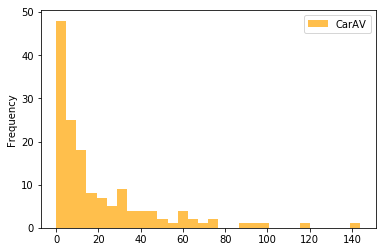

In [103]:
df_florida = df_draft[df_draft['College/Univ'] == 'Florida St.']
df_florida = df_florida[['CarAV', 'College/Univ']]
hist = df_florida.plot.hist(bins=30, alpha=0.7, color='orange')
media = df_florida.mean()
media

CarAV    24.503401
dtype: float64

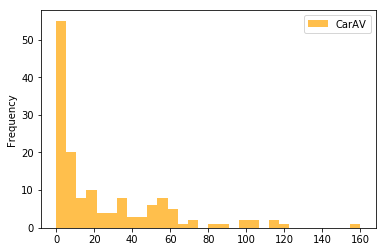

In [104]:
df_miami = df_draft[df_draft['College/Univ'] == 'Miami (FL)']
df_miami = df_miami[['CarAV', 'College/Univ']]
hist = df_miami.plot.hist(bins=30, alpha=0.7, color='orange')
media = df_miami.mean()
media

CarAV    22.040541
dtype: float64

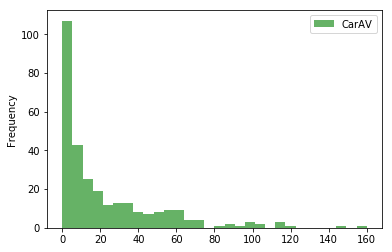

In [105]:
# A (Jogadores que vieram das universidades FLórida St. ou Miami (FL))
frames = [df_florida, df_miami]
df = pd.concat(frames)
hist = df.plot.hist(bins=30, alpha=0.6, color='green')
media = df.mean()
media

CarAV    17.069864
dtype: float64

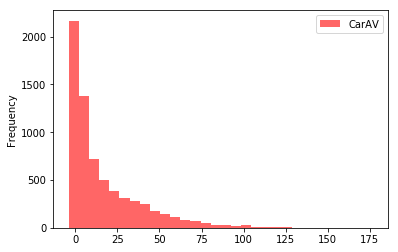

In [106]:
# B (Jogadores que vieram das demais universidades)
df = df_draft[df_draft['College/Univ'] != 'Florida St.']
df = df[df['College/Univ'] != 'Miami (FL)']
df = df[['CarAV', 'College/Univ']]
hist = df.plot.hist(bins=30, alpha=0.6, color='red')
media = df.mean()
media

Podemos perceber que a média de B (jogadores que não vieram nem de Flória St. e nem de Miami (FL)), 17.07, é consideravelmente menor do que a média de A, 22.04, o que faz com que a hipótese alternativa (H1) seja verdadeira.

É importante ressaltar também que, nessa análise, não caímos em nenhum dos dois tipos de erro, que se fariam presentes caso rejeitássemos a hipótese nula sendo que ela é verdadeira ou se não rejeitássemos a hipótese nula sendo que ela é falsa. Em outras palavras, rejeitamos a hipótese nula e ela é, realmente, falsa.